In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('default')
%matplotlib inline

Import Data

In [2]:
df = pd.read_csv ('/content/VI_IDEA.csv')
df.head()

FileNotFoundError: [Errno 2] No such file or directory: '/content/VI_IDEA.csv'

Split Train and Test dataset

In [ ]:
X_train = df[:int(df.shape[0]*0.75)]
X_test = df[int(df.shape[0]*0.75):]



Exponential Moving Average

In [ ]:
df = df['Adj_Close'].to_frame()

for i in range(1,31):
  df['EWMA',i] = df['Adj_Close'].ewm(span=i).mean()
  Y_train = df[:int(df.shape[0]*0.75)]



Root Mean Square Error

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

result_test = []
for i in range(1,31):
  rms_test = mean_squared_error(df['Adj_Close'][924:len(df)], df['EWMA',i][924:len(df)])
  rms_test = sqrt(mean_squared_error(df['Adj_Close'][924:len(df)], df['EWMA',i][924:len(df)]))
  test = rms_test
  result_test.append(test)

print(result_test)



result_train = []
for i in range(1,31):
  rms_train = mean_squared_error(X_train['Adj_Close'], Y_train['EWMA',i])
  rms_train = sqrt(mean_squared_error(X_train['Adj_Close'], Y_train['EWMA',i]))
  train = rms_train
  result_train.append(train)

print(result_train)


  

[0.0, 0.21363481785888458, 0.3512161454758941, 0.4610463741119785, 0.5560881454125127, 0.6413142154394751, 0.71916014583816, 0.7910898839044537, 0.8581238875708688, 0.9210416323187667, 0.9804698529290831, 1.0369266003650923, 1.09084654001807, 1.14259744965758, 1.1924920941590313, 1.2407973579997609, 1.2877415574680953, 1.3335204334358446, 1.3783021289772137, 1.422231356586605, 1.4654329040352125, 1.508014593261648, 1.550069783081935, 1.5916794892833566, 1.6329141825229712, 1.6738353141224738, 1.7144966115748717, 1.754945178855698, 1.795222431112498, 1.835364888736897]
[0.0, 0.6133696909503494, 1.0048067105893204, 1.3058733765033739, 1.556767972993059, 1.77540989213979, 1.9713588564667308, 2.15027468217499, 2.315752149421318, 2.4702047554191235, 2.61533461261335, 2.7523980588873562, 2.882361841290934, 3.0059976222935916, 3.123940579077492, 3.236726627562143, 3.344816696186117, 3.44861302620404, 3.5484704797159545, 3.6447046626235418, 3.737597970627879, 3.827404246016452, 3.9143524779716

Ploting RMSE value for 1 to 30

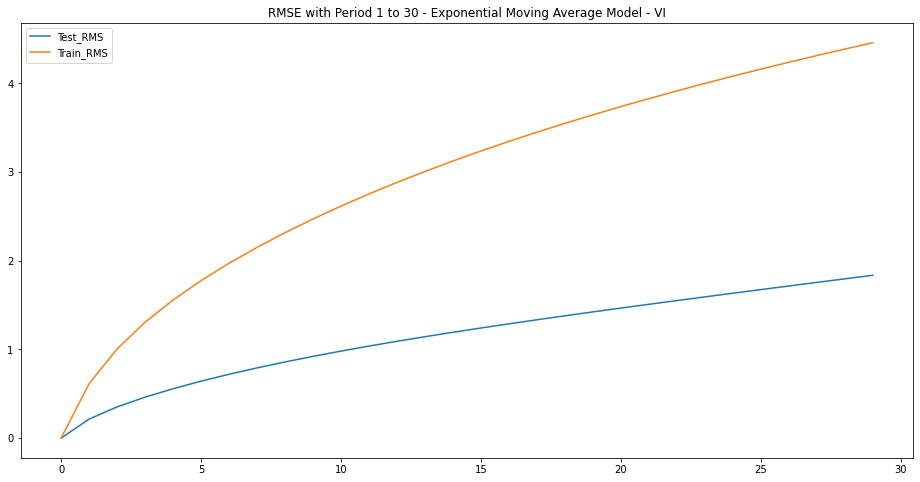

In [ ]:
x=result_test
y = result_train
plt.figure(figsize=[16,8])
plt.title('RMSE with Period 1 to 30 - Exponential Moving Average Model - VI')
plt.plot(x,label='Test_RMS')
plt.plot(y,label='Train_RMS')
plt.legend(loc=2)
                                   


Ploting Exponential Moving Average

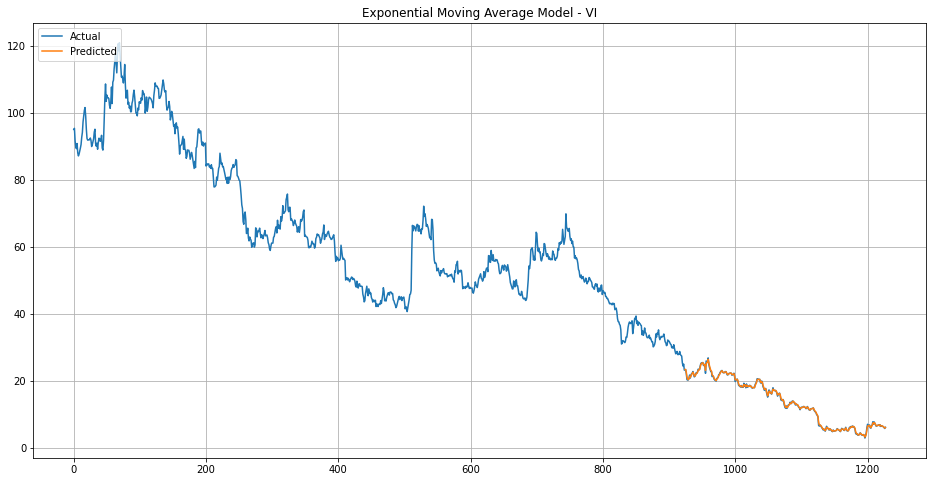

In [ ]:
plt.figure(figsize=[16,8])
plt.title('Exponential Moving Average Model - VI')
plt.grid(True)
# df.set_index('Date',inplace=True)
plt.plot(df['Adj_Close'],label='Actual')
plt.plot(df['EWMA',2][924:len(df)],label='Predicted')
plt.legend(loc=2)